# Script Scanning Notebook
Contains a simple script to collect character and line-level info from script objects.

In [10]:
# Imports
from collections import Counter        # Python library Counter object
from os import listdir                 # Diretory listing function
import json                            # json handling

import pandas as pd                    # Pandas for data aggregation
from bs4 import BeautifulSoup as soup  # BeautifulSoup object
from tqdm import tqdm_notebook         # Visual progress bar

In [12]:
# Get list of all json script objects
scripts = listdir('./scripts')
scripts.remove('.DS_Store')
SCRIPT_DIR = './scripts/{}'

# Create DataFrame to capture output
df = pd.DataFrame()

# Create loop to run through jsons
for script in tqdm_notebook(scripts):
    with open(SCRIPT_DIR.format(script)) as f:
        data = json.load(f)
    try: 
        raw = str(soup(data['script'], "lxml").find_all("pre")[-1])
        raw_chars = [c for c in raw]
        raw_lines = raw.split(sep='\n')

        # Count characters
        char_count = len(raw_chars)
        char_counter = Counter(raw_chars)

        # Count lines and line lengths
        line_count = len(raw_lines)
        line_lengths = [len(x) for x in raw_lines]

        # Output info as a dictionary
        result = {
            'script':script[:-5],
            'lines':line_count,
            'chars':char_count,
            'max_length':max(line_lengths),
            'avg_length':sum(line_lengths)/len(line_lengths),
        }
        result.update(char_counter)

        # Append ``result`` to df
        df = df.append(result, ignore_index=True)
    except:
        print("Error parsing {}".format(script[:-5]))
        
df

HBox(children=(IntProgress(value=0, max=1169), HTML(value='')))

Error parsing Matchstick Men
Error parsing Harry Potter and the Deathly Hallows Part 1
Error parsing Lion King, The
Error parsing Casablanca
Error parsing Jade
Error parsing Benny & Joon
Error parsing Batman Returns
Error parsing Unforgiven
Error parsing Sneakers
Error parsing Mr. Holland's Opus
Error parsing Incredibles, The
Error parsing Harry Potter and the Prisoner of Azkaban
Error parsing Superfights
Error parsing Eyes Wide Shut
Error parsing 25th Hour
Error parsing Donnie Darko
Error parsing Robocop
Error parsing Harry Potter and the Sorcerer's Stone
Error parsing Equilibrium
Error parsing Shadow of the Vampire
Error parsing Lethal Weapon 4
Error parsing Kiss of the Spider Woman
Error parsing Speed
Error parsing El Mariachi
Error parsing Goodfellas
Error parsing Vertigo
Error parsing Batman Forever
Error parsing Outbreak
Error parsing Clockwork Orange, A
Error parsing Innerspace
Error parsing A.I.
Error parsing Monster's Ball
Error parsing Harry Potter and the Chamber of Secrets


,,,!,"""",#,&,',(,),",",...,,,,,¨,¼,²,¹,,
0,6559.0,133869.0,107.0,244.0,82.0,1.0,923.0,200.0,200.0,804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6796.0,142468.0,230.0,70.0,19.0,NaN,903.0,310.0,310.0,1115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5672.0,127975.0,174.0,124.0,2.0,NaN,1037.0,411.0,411.0,1046.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6900.0,105669.0,602.0,77.0,9.0,4.0,1022.0,390.0,384.0,1117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7784.0,28594.0,179.0,83.0,NaN,NaN,1285.0,389.0,389.0,2268.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6065.0,60699.0,168.0,169.0,11.0,NaN,852.0,296.0,296.0,1346.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3976.0,81484.0,212.0,34.0,NaN,1.0,564.0,185.0,185.0,706.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8783.0,28954.0,137.0,9.0,1.0,NaN,175.0,553.0,553.0,1619.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4361.0,42152.0,7.0,2.0,NaN,NaN,630.0,94.0,93.0,1115.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4635.0,63641.0,533.0,122.0,35.0,2.0,677.0,253.0,253.0,1099.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
stats = df[['avg_length','chars','lines','max_length','script']]

In [47]:
chars = df.columns.values.tolist()
for x in stats.columns.values.tolist():
    chars.remove(x)

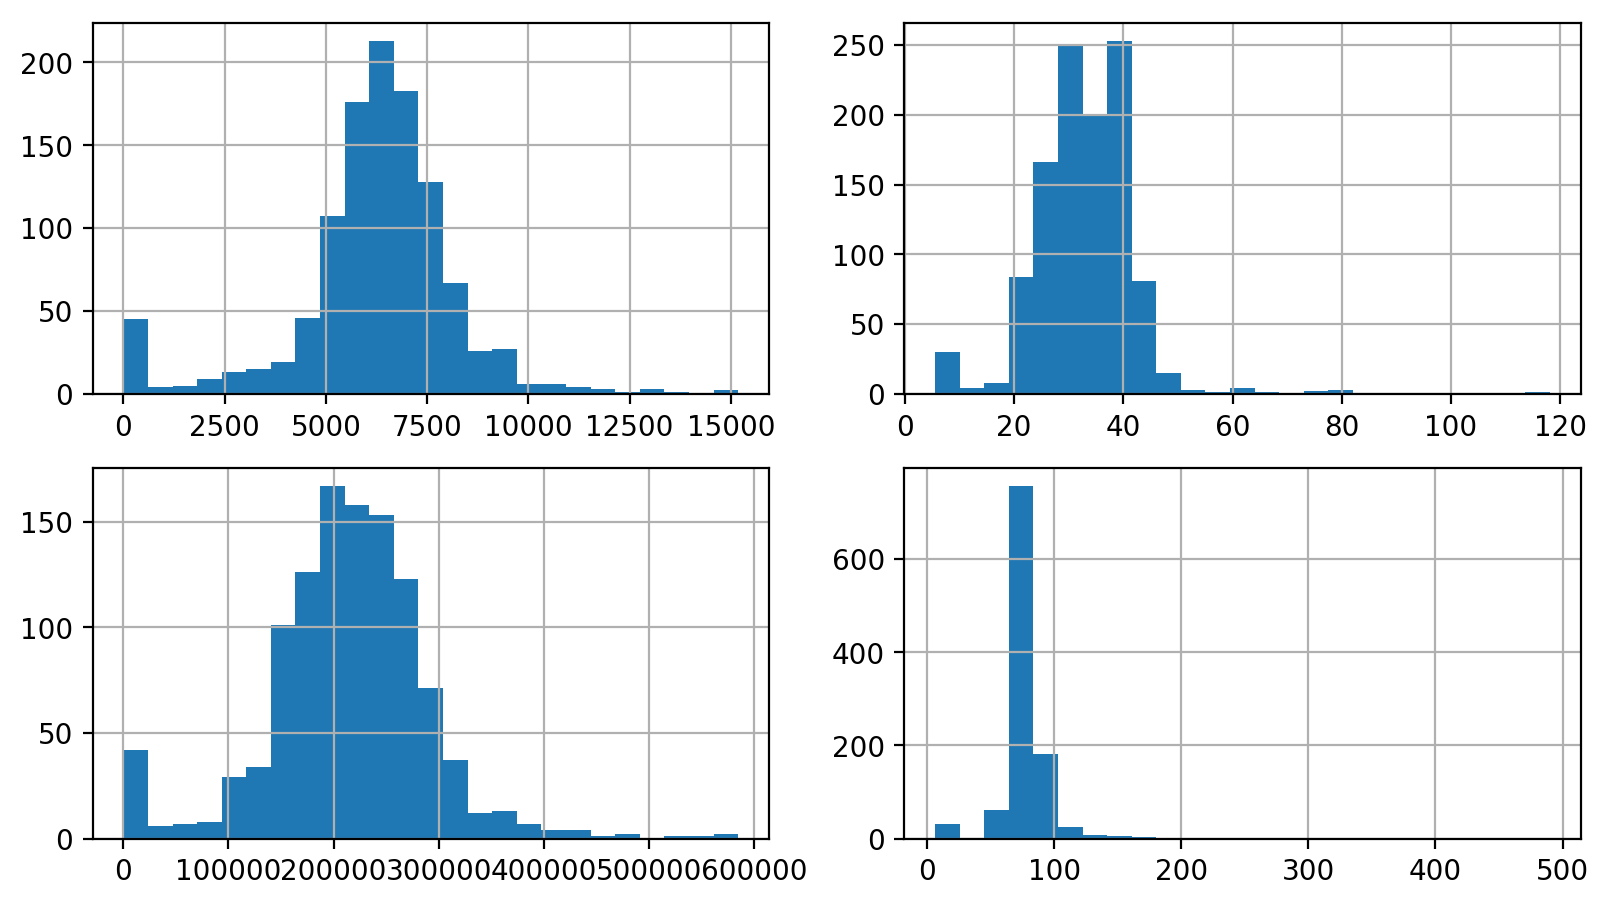

In [46]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(9.6, 5.4), dpi=200)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

stats['lines'].hist(ax=ax1, bins=25)
stats['chars'].hist(ax=ax3, bins=25)
stats[stats['avg_length'] < 500]['avg_length'].hist(ax=ax2, bins=25)
stats[stats['max_length'] < 500]['max_length'].hist(ax=ax4, bins=25)
plt.show()

In [61]:
df[chars].mean(axis=0).sort_values(ascending=False)[75:100]

2    78.988517
0    70.846525
é    67.232394
    60.307692
3    55.652216
q    55.368814
4    51.637245
5    50.627432
9    50.493177
­    48.677419
6    47.047619
Z    45.828685
7    45.038000
Á    44.750000
8    44.680830
    44.600000
î    41.777778
Î    41.666667
ô    40.454545
«    37.500000
·    34.333333
Ñ    33.333333
ç    32.818182
ù    32.166667
»    28.444444
dtype: float64